<a href="https://colab.research.google.com/github/JosePabloGFnl/Redes-Neuronales-Artificiales/blob/main/Tarea4.1/ql2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

James Bond
in a dangerous environment


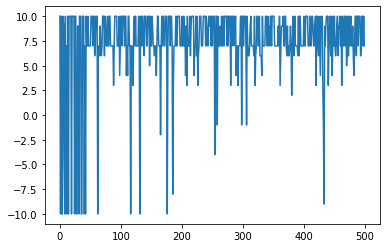

In [2]:
#4.1 - El código ql2.py implementa el Algoritmo 1.1 del Cap. 1 del libro "Foundations of deep reinforcement learning", dado en la sección de recursos. 
#El ejercicio consiste en 1) Explicar cómo se relacionan las funciones de ambos y cómo se logra en sí la implementación de las funciones en pseudo-código 
#del Algoritmo 1.1 en el programa ql2.py 2) Permitir al agente explorar durante 10 pasos cada episodio. Explicar la curva de aprendizaje resultante.
""" 
Q-Learning implemented like a dictionary.
The keys are (state, action) pairs and the values are 
the current estimates of Q(s,a).

"""

import numpy as np
import random
import copy

Q = {} #dictionary for the Q function [(state, action), value]

b = 0.95 #bias parameter (particular to the example)

Actions = [0, 1, 2] #list of possible agent's actions (particular to the example)

Q[(0,0)] = 0.0 ### some initializations particular to the example
amax0 = 0 ### some initializations particular to the example 

class Envsim: # the necessary methods and data structures for the simulation of the environment

      def __init__(self, name):
        self.name = name

      def rand0(self, state):
          s = copy.copy(state)
          s = s + 2.0*(random.randint(0, 1) - 0.5)
          #print(s, round(s))
          return round(s)
          
      def rand1(self, state):
          s = copy.copy(state)
          u = random.uniform(0,1)
          #print(s)
          if u < b:
             s = s + 1
          else:
             s = s - 1
          #print(u,s)
          return s
          
      def rand2(self, state):
          s = copy.copy(state)
          u = random.uniform(0,1)
          #print(s)
          if u < b:
             s = s - 1
          else:
             s = s + 1
          #print(u,s)
          return s   

      def Enviro(self, state, action): # Given a (state_t, action_t) pair, it generates (s_t+1, r_t+1)
          a = copy.copy(action)
          s = copy.copy(state)
          z = Envsim(self)
          r = 0.0
          ra = -1.0
          rb = 1.0
          rc = 0.0
          if a==0:
             s = z.rand0(state)
          if a==1:
             s = z.rand1(state)
          if a==2:
             s = z.rand2(state)
          else:
             s = s
             
          if -10 < s < 0:
             r = ra
          if 0 < s < 10:
             r = rb    
          if s == 0:
             r = rc  
          
          return s, r
                    
class Policy: #class for action selection and value updates according to the Q-Learning rule

      def __init__(self, name):
          self.name = name

      def maxq(self, state, Actions):
          s = copy.copy(state)
          max = -10e10
          amax = None
          for a in Actions:
              u = Q.get(tuple([s,a])) #value associated to the key list [s,a]
              if u is None:
                 u = -20e10
              if u > max:
                 amax = copy.copy(a)
                 max = copy.copy(u)
          #print(s, amax)
          return amax
          
      def epsilon_greedy(self, state, Actions): #epsilon-greedy decisions for systems 
          #in which is possible to select any action at random given state s
          epsilon = 0.1
          z = Policy(self)
          comple = np.random.rand()
          if epsilon > comple:
             #chooses and action at random
             a = random.randint(0, (len(Actions)-1))
             #print(a)
             return a
          else:
              #Returns the action with the maximum Q-value
              a = z.maxq(state, Actions)
              #print(a)
              return a
          
      def updateq(self, s0,a0,r1,s1,a1):
          alpha = 0.2 #learning rate
          gamma = 1.0 #discount factor
          q0 = Q.get((s0,a0))
          if q0 is None:
                 q0 = 0.0
          q1 = Q.get((s1,a1))
          if q1 is None:
                 q1 = 0.0
          u = q0 + alpha*(r1 + gamma*q1 - q0)         
          Q[(s0,a0)] = u
          return 

### These are the generic fundamental classes for Q-learning ###################
class Agent:

    def __init__(self, name):
        self.name = name
        
    def action_reset(self):
        action = 0
        return action
          
    def act(self, state):
        z = Policy(self)
        s = copy.copy(state)
        #a = z.maxq(s, Actions)
        a = z.epsilon_greedy(s, Actions)
        #print(a)
        return a
    
    def update(self, state0, action0, reward, state, action):
        s0 = copy.copy(state0)
        a0 = copy.copy(action0)
        r1 = copy.copy(reward)
        s1 = copy.copy(state)
        a1 = copy.copy(action)
        z = Policy(self)
        z.updateq(s0,a0,r1,s1,a1)
        return

class Environment:

    def __init__(self, name):
        self.name = name
        
    def reset(self):
          state = 0
          return state
          
    def step(self, state, action):
        s = copy.copy(state)
        a = copy.copy(action)
        z = Envsim(self)
        s, r = z.Enviro(s,a)
        return s, r
    
    def done(self, state):
        if state == -10 or state == 10:
           vdone = True
        else:
            vdone = False
        return vdone

################################################################################
### Main Program ###

MAX_EPISODE = 500
#MAX_TIME = 3
MAX_TIME = 10
agent = Agent("James Bond")
env = Environment("in a dangerous environment")
print(agent.name)
print(env.name)
l = [None] * MAX_EPISODE #list to draw the learning curve
#action = agent.action_reset()
for episode in range(MAX_EPISODE):
    state = env.reset()
    action = agent.action_reset() #depending on the learning problem
    cur = 0.0 #cumulative reward for visualization purposes
    for t in range(MAX_TIME):
        state0 = copy.copy(state)
        action0 = copy.copy(action)
        state, reward = env.step(state0, action0)                
        agent.update(state0, action0, reward, state, action)
        action = agent.act(state)
        #print(action)
        #print(state, reward)
        cur = cur + reward
        if env.done(state) == True:
           break
    #print(cur)
    #print(Q.get((3,1)))
    l[episode] = cur
    #l[episode] = Q.get((-5,0))

#print(Q.items())

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(l)
plt.show()